#**Proyek Akhir : Klasifikasi Gambar**
##oleh : Shinta Riandini

Berikut kriteria submission yang harus Anda penuhi:
* Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command: https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip.
* Dataset harus dibagi menjadi train set dan validation set.
* Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
* Harus mengimplementasikan augmentasi gambar.
* Menggunakan image data generator.
* Model harus menggunakan model sequential.
* Pelatihan model tidak melebihi waktu 30 menit.
* Program dikerjakan pada Google Colaboratory.
* Akurasi dari model minimal 85%.
* Dapat memprediksi gambar yang diunggah ke Colab seperti gambar di bawah.

In [90]:
#menyiapkan library tansorflow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [94]:
#menyiapkan dataset dan mengekstraksi pada file zip
import zipfile, os
from google.colab import drive
from google.colab import files

drive.mount('/content/gdrive')#hubungkan ke gdrive
%cd /content/gdrive/MyDrive/MLDicoding
local_zip ='/content/gdrive/MyDrive/MLDicoding/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/MyDrive/MLDicoding/')
zip_ref.close()

base_dir = '/content/gdrive/MyDrive/MLDicoding/rockpaperscissors/rps-cv-images'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/MLDicoding


In [95]:
# tampilkan daftar file
os.listdir(base_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [96]:
# augmentasi gambar (Imange data generator)
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4 #40% data validasi, 60% data train
)

In [97]:
# Menyiapkan data training dan data validation (train set dan validasi set)

training_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    shuffle = True,
    subset = 'training' # menghasilkan batch gambar training (1.314 sampel)
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    subset = 'validation' # menghasilkan batch gambar validation (874 sampel)
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [98]:
# model neural network untuk klasifikasikan gambar yang membentuk gunting, batu, atau kertas.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [99]:
# kompilasi model untuk proses pelatihan model.
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [100]:
# melatih model yang dibuat dengan model fit (kira-kira 5 menitan)
model.fit(
    training_generator,
    steps_per_epoch = 20,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 2
)

Epoch 1/15
20/20 - 20s - loss: 1.1407 - accuracy: 0.4033 - val_loss: 1.0442 - val_accuracy: 0.4609 - 20s/epoch - 981ms/step
Epoch 2/15
20/20 - 18s - loss: 0.8584 - accuracy: 0.6578 - val_loss: 0.6272 - val_accuracy: 0.7969 - 18s/epoch - 887ms/step
Epoch 3/15
20/20 - 20s - loss: 0.4947 - accuracy: 0.8361 - val_loss: 0.3719 - val_accuracy: 0.8516 - 20s/epoch - 1s/step
Epoch 4/15
20/20 - 18s - loss: 0.3637 - accuracy: 0.8734 - val_loss: 0.3080 - val_accuracy: 0.8906 - 18s/epoch - 884ms/step
Epoch 5/15
20/20 - 17s - loss: 0.2660 - accuracy: 0.9082 - val_loss: 0.2844 - val_accuracy: 0.8984 - 17s/epoch - 832ms/step
Epoch 6/15
20/20 - 17s - loss: 0.2345 - accuracy: 0.9213 - val_loss: 0.1989 - val_accuracy: 0.9609 - 17s/epoch - 847ms/step
Epoch 7/15
20/20 - 17s - loss: 0.2103 - accuracy: 0.9213 - val_loss: 0.1511 - val_accuracy: 0.9609 - 17s/epoch - 849ms/step
Epoch 8/15
20/20 - 17s - loss: 0.1903 - accuracy: 0.9484 - val_loss: 0.3580 - val_accuracy: 0.8594 - 17s/epoch - 868ms/step
Epoch 9/15


Saving images.jpeg to images (4).jpeg
1/1 [==============================] - 0s 49ms/step
images (4).jpeg
Ini adalah Gambar Gunting (Scissor)


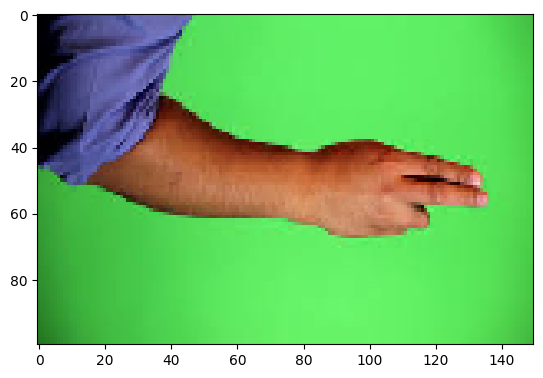

In [102]:
# PENGUJIAN UNTUK MENGUJI GAMBAR BARU (disini saya download gambar contoh dari google)
# Import library dan modul yang dibutuhkan untuk pengujian
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

# perulangan untuk setiap gambar yang diupload
for gambar in uploaded.keys():
# predicting images
  path = gambar
  img = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  clasification = model.predict(images, batch_size = 10)

# menampilkan gambar yang diupload dan kategorinya
  print(gambar)
  if clasification[0][0] == 1:
    print("Ini adalah Gambar Kertas (Paper)")
  elif clasification[0][1] == 1:
    print("Ini adalah Gambar Batu (Rock)")
  elif clasification[0][2] == 1:
    print("Ini adalah Gambar Gunting (Scissor)")
  else:
    print("Ini adalah Gambar yang tidak dikenali")

In [103]:
# cek akurasi
loss, accuracy = model.evaluate(validation_generator)
print('Accuracy:', accuracy)

28/28 [==============================] - 14s 496ms/step - loss: 0.1838 - accuracy: 0.9474
Accuracy: 0.9473684430122375
